## Assignment 1 - Intensity Transformation ##

**M.W.M Shakir**
**D/ENG/21/0108/EE**

101
125
30
256


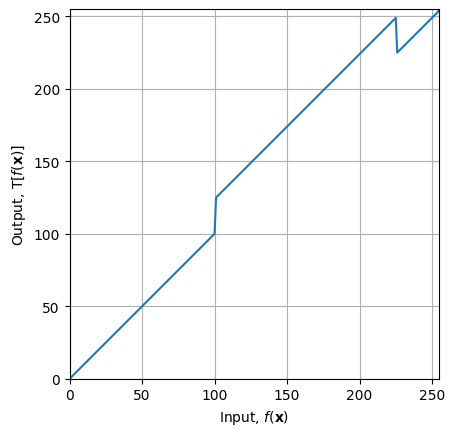

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#not changed
im = cv.imread('images/natasha_grayscale.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None

#Creating the regions
t1 = np.linspace(0, 100, 101).astype('uint8') 
    
print(len(t1))   
t2 = np.linspace(125, 249, 125).astype('uint8') 
print(len(t2))
t3 = np.linspace(225, 255,30).astype('uint8') 
print(len(t3))

#transform
transform = np.concatenate((t1,t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

#fig
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid()
plt.show()

#showing image
cv.namedWindow('Image', cv.WINDOW_NORMAL)
cv.imshow('Image', im)
cv.waitKey(0)
image_transform = cv.LUT(im, transform)
cv.imshow('Image', image_transform)
cv.waitKey(0)
cv.destroyAllWindows()